In [42]:
import numpy as np
import pandas as pd
from matplotlib import colormaps

In [43]:
def auto_informacao(i):
    """
    Essa funçãto calcula a autoinformação de um determinado símbolo produzido por uma fonte X.
    :param i: Probabilidade de um símbolo ser transmitido pela fonte X.  
    :return: Informação em bits
    """
    return round(-1 * np.log2(i), 4)

In [44]:
## ou informação média
def entropia(c):
    """
    Essa função calcula a entrópia de uma fonte. A entrópia de uma fonte descreve a quantidade média de informação que uma fonte pode transmitir.
    :param c: A média ponderada da auto_informacao de todos os símbolos produzidos por uma fonte X.
    :return: Conjunto de probabilidade de todos os símbolos produzidos por uma fonte X. 
    """
    try:
        iter(c)
    except TypeError:
        raise Exception("c não é uma lista")
    if not c is np.ndarray:
        c = np.array(c)

    return round(sum(np.array(c) * np.log2(1 / np.array(c))), 4)


def probabilidades(c):
    """
    Função auxiliar para calcular a probabilidade de ocorrência de cada símbolo de uma coleção.
    :param c: Coleção de símbolos com probabilidade de ocorrência sem dependências.
    :return: Lista com tamanho len(c) com as probabilidades de ocorrência de cada símbolo em relação a todos os items.
    """
    try:
        iter(c)
    except TypeError:
        raise Exception("c não é uma lista")

    quantidade_simbolos = {}
    for i in c:
        if quantidade_simbolos.get(i) is None:
            quantidade_simbolos[i] = 1
        else:
            quantidade_simbolos[i] = quantidade_simbolos[i] + 1

    probabilidade_simbolos = {}

    for i in list(set(c)):
        probabilidade_simbolos[i] = quantidade_simbolos[i] / len(c)

    return list(probabilidade_simbolos.values())

## Entrópia de um texto

In [45]:
texto = """Nullam blandit gravida consectetur. Sed placerat nec dui ut hendrerit. Praesent dictum euismod ipsum in pharetra. Nullam eu molestie velit. Nullam sit amet volutpat nibh, vel vulputate massa. Curabitur vehicula, nibh eget fermentum ultrices, nisi ante pellentesque nisi, ut auctor risus nulla nec eros. Sed urna felis, fringilla a aliquet eu, venenatis porttitor nisi. Vestibulum erat nisi, efficitur in congue id, tincidunt eu velit. Fusce quis dignissim turpis. Duis in risus felis."""

In [46]:
entropia(probabilidades(texto))

4.1852

## Entropia de uma imagem

In [47]:
from PIL import Image
import matplotlib.pyplot as plt

In [48]:
img = Image.open("./example.jpg")
img_cinza = img.convert('L')

Precisamos agora calcular a entropia dessa imagem.  

In [49]:
pixels_flatten = np.array(img_cinza).flatten()
entropia(probabilidades(pixels_flatten))

7.7088

Agora, irei calcular a entrópia de cada pixel dentro de um subconjunto 5x5 da imagem:

In [50]:
N = 5
img_cinza_arr = np.array(img_cinza)
shape = img_cinza_arr.shape
E = np.array(img_cinza_arr)
for row in range(shape[0]):
    for col in range(shape[1]):
        Lx = np.max([0, col - N])
        Ux = np.min([shape[1], col + N])
        Ly = np.max([0, row - N])
        Uy = np.min([shape[0], row + N])
        region = img_cinza_arr[Ly:Uy, Lx:Ux].flatten()
        E[row, col] = entropia(probabilidades(region))

(-0.5, 1279.5, 719.5, -0.5)

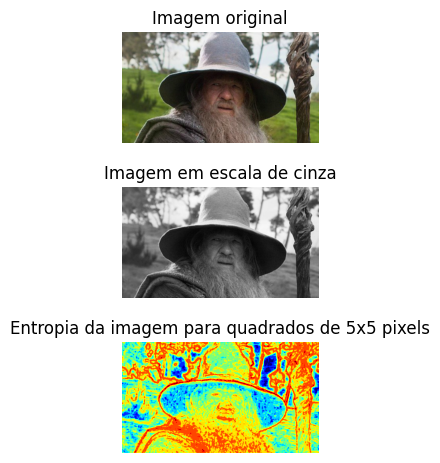

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

fig.tight_layout()

ax1.imshow(np.array(img))
ax1.set_title("Imagem original")
ax1.axis('off')

ax2.imshow(img_cinza_arr, cmap=colormaps.get_cmap("gray"))
ax2.set_title("Imagem em escala de cinza")
ax2.axis('off')

ax3.imshow(E, cmap=colormaps.get_cmap("jet"))
ax3.set_title("Entropia da imagem para quadrados de 5x5 pixels")
ax3.axis('off')
# plt.xlabel('Entropy in 10x10 neighbourhood')